<img src="dsci512_header.png" width="600">

# Lecture 2 Basic Data Structures

## Learning Objectives

- Explain what a data structure is and why it is useful in computing at a high level.
- List Python's built-in data structures and describe their properties (review from 511).
- Explain basic (user-defined) data structures: stacks, queues, linked lists, hash tables, and trees.
- Implement basic data structures in Python.
- Explain the pros and cons of hash tables, and how they work at a high level.
- Explain what recursion is, and why both the base case(s) and recursive step(s) are essential.
- Compare and contrast a binary search tree to a hash table.

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import altair as alt

## Introduction to Data Structures:

- A data structure is a way to organize and manage data.
- Data structures help with writing more efficient (both in terms of time and space) code.
- Main operation we consider for data structures:
    - inserting a new element
    - deleting an element
    - checking if an element is present (contain)

## Python Built-in Data Structures:
 - **Lists**
    - inserting a new element: `list.append()`, `list.insert()`, etc. 
    - deleting an element: `list.remove()`, `list.pop()`, etc.
    - checking if an element is present: `in`
 - **Tuples**
    - inserting a new element: immutable (but we can still "add" two tuples)
    - deleting an element: immutable
    - checking if an element is present: `in` 
 - **Sets**
    - inserting a new element: `set.add()`, `^` , `|`, etc.
    - deleting an element: `set.remove()`, `-`, etc.
    - checking if an element is present: `in` 
 - **Dictionaries**
    - inserting a new element: `dict.update()`, etc. 
    - deleting an element: `dict.pop()`, etc.
    - checking if an element is present: `in` (for `dict.keys(`), `dict.values()`)  


In the previous lecture, we saw that checking if an element is present in a Python set is very efficient. Let's look into this more.

### Hash Tables & Hash Functions


Python's `set` type supports the following operations in $O(1)$ time:
  - inserting a new element
  - deleting an element
  - checking if an element is present

How could we implement this using the tools we already have?

- Well, what about using linear search to find elements, e.g. a `list`?
  - This is too slow
- What about using binary search?
  - Now searching is fast, but insertion/deletion is slow, because we need to maintain an ordered list
- Enter the [hash table](https://en.wikipedia.org/wiki/Hash_table) - to save the day!
  - Trees could also work, but hash tables are the most popular.
  
#### Hash Functions

Python objects have a _hash_:

In [ ]:
hash("mds")

In [ ]:
hash("")

It looks like the hash function returns an integer.

In [ ]:
hash(5.5)

In [ ]:
hash(5)

In [ ]:
hash(-9999)

It looks like the hash function of a Python integer is itself. Or at least small enough integers.

In [ ]:
hash(999999999999999999999999)

Sometimes it fails?

In [ ]:
hash([1, 2, 3])


In [ ]:
hash((1, 2, 3))

In [ ]:
hash(None)

If a Python `set` is a hash table, that means items in it must be hashable (`dict` has the same requirement, for keys):

In [ ]:
s = set()

In [ ]:
s.add(5.5)

In [ ]:
s.add("mds")

In [ ]:
s

In [ ]:
s.add([1, 2, 3])

In [ ]:
s.add((1, 2, 3))

In [ ]:
s

##### Hash Function Overview
- Immutable objects (numbers, strings, tuples) are hashable, mutable objects (lists, dicts) are not
- Hash functions are **deterministic**
- Hash functions have a **fixed-size output**
- Hash function are **collision-resistant**
- Hash functions are extremely broadly useful, beyond what we talk about in this course 🤓

#### Hash Tables

- So, it looks like the hash function maps from an object to an integer.
- And that Python `set`s use these hash functions.
- How do they work?
- The hash table is basically a list of lists, and the hash function (mod the array size) maps an object to its location in the outer list.
  - But it's a bit more complicated than that.
  - The list typically expands and contracts automatically as needed.
  - These operations may be slow, but averaged or "amortized" over many operations, the runtime is $O(1)$
  - The hash function depends on this array size.
  - There's also an issue of collisions: when two different objects hash to the same place.
- Roughly speaking, we can insert, retrieve, and delete things in $O(1)$ time so long as we have a "good" hash function.
  - The hash function will be "good" for default Python objects, and if you end up needing to implement your own one day you should read a bit more about it.

#### A Simple Hash Table

Below is a (very low-quality) hash table implementation, with only 4 buckets by default:

<!--
class HashTable:
    
    def __init__(self, num_buckets=4):
        self.stuff = list() # A list of lists
        self.n = num_buckets
        
        for i in range(num_buckets):
            self.stuff.append([]) # Create the inner lists, one per bucket
        
    def add(self, item):
        if not self.contains(item):
            self.stuff[hash(item) % self.n].append(item)
        
    def contains(self, item):
        return item in self.stuff[hash(item) % self.n]
    
    def __str__(self):
        return str(self.stuff)
-->

In [ ]:
class HashTable:
    
    def __init__(self, num_buckets=4):
        self.stuff = list() # A list of lists
        self.n = num_buckets
        
        for i in range(num_buckets):
            self.stuff.append([]) # Create the inner lists, one per bucket
        
    def add(self, item):
        if not self.contains(item):
            self.stuff[hash(item) % self.n].append(item)
        
    def contains(self, item):
        return item in self.stuff[hash(item) % self.n]
    
    def __str__(self):
        return str(self.stuff)

(Note: The `hash` function has a random seed that is set at the start of every Python session, so your actual results my vary from mine.)

In [ ]:
ht = HashTable()
print(ht)

- So far, all 4 buckets are empty. 
- Now let's add something:

In [ ]:
ht.add("hello")
print(ht)

"hello" went into this bucket because 

In [ ]:
hash("hello")

In [ ]:
hash("hello") % 4

Now let's add more things:

In [ ]:
ht.add("goodbye")
print(ht)

In [ ]:
ht.add("test")
print(ht)

In [ ]:
ht.add("item")
print(ht)

In [ ]:
ht.add("what")
print(ht)

If we want to look for something:

In [ ]:
ht.contains("blah")

False because 

In [ ]:
hash("blah") % 4

And "blah" is not found in bucket. 

In [ ]:
ht.contains("item")

- Same thing here.
- The key idea is that you **only need to look in one bucket** - either it's in that bucket, or it's not in the _entire_ hash table.

In [ ]:
print(ht)

- Above we have a _collision_: that is, 2 items in the same bucket.

**Question:** If my hash table has 4 buckets, what is the time complexity of `contains`?

A: $O(1)$ \
B: $O(n)$ \
C: $O(log(n))$ \
D: $O(nlog(n))$


<br><br><br>
**Answer** $O(n)$ -> we narrow our search down to one of the 4 buckets, but we still need to search through all the elements in that bucket. Since the size of the bucket is $\frac{n}{4}$, our time complexity is $O(n)$.




- If the main list is able to dynamically grow as the number of items grows, we can keep the number of collisions low.
- This preserves the $O(1)$ operations.

#### Lookup Tables, Python `dict` 

- Python's `dict` type is a dictionary (aka symbol table)
- A dictionary should support the following operations:
  - inserting a new element
  - deleting an element
  - finding an element
- It is much like a `set` except the entries, called "keys", now have some data payload associated with them, which we call "values".
- It is also implemented as a hash table, meaning you can expect $O(1)$ operations.
- Only the keys are hashed, so only the keys have to be hashable.
  - A list can be a value, but not a key.

In [ ]:
d = dict()
d[5] = "a"
d["b"] = 9
d

In [ ]:
5 in d

In [ ]:
9 in d  # it only searches the keys

In [ ]:
d[5]

In [ ]:
d[6]

Hashable types:

In [ ]:
d[[1,2,3]] = 10

In [ ]:
d[10] = [1,2,3] # OK

A reminder of some dictionary syntax:

In [ ]:
# Comprehensions for dictionaries
f = {i: i*2 for i in range(10)}
f

In [ ]:
# Iteration syntax
for key, val in f.items():
    print("key =", key, " val =", val)

In [ ]:
# A dictionary can be a value inside another dictionary
g = dict()
g[5] = f
g

### More user-defined data structures

#### Stacks and queues 

- We want a data structure that we can put things into, and then retrieve them later.
- A [stack](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) does with with the "last in, first out" (LIFO) mentality - like a stack of books or plates.

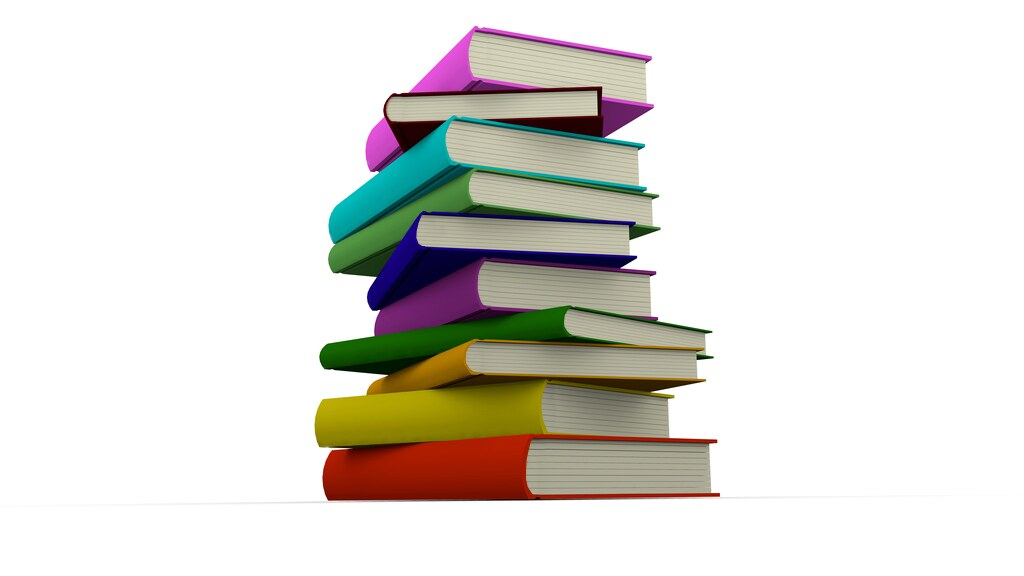

In [ ]:
class Stack:
    """A stack data structure."""

    def __init__(self):
        self.data = list()

    def push(self, item):
        """
        Adds a new item to the top of the stack.
        
        Parameters
        ----------
        item : object
           An item added to the stack
        """
        self.data.append(item)

    def pop(self):
        """
        Removes the item that is at the top of the stack and returns the item.

        Returns
        -------
        object 
             The item that was last added to the stack.

        Examples
        --------
        >>> stack = Stack()
        >>> stack.push(1)
        >>> stack.push([1, 2, "dog"])
        >>> stack.push("popcorn")
        >>> stack.pop()
        'popcorn'
        """
        return self.data.pop()

    def isEmpty(self):
        """ 
        Checks to see if the stack is empty.

        Returns
        -------
        bool 
             True if the stack contains no items, False otherwise.    

        Example
        --------
        >>> stack = Stack()
        >>> stack.isEmpty()
        True
        """
        return len(self.data) == 0
    
    def __str__(self):
        return self.data.__str__()

In [ ]:
s = Stack()

s.push("first")
s.push("second")

print(s)

In [ ]:
s.pop()

In [ ]:
print(s)

In [ ]:
s.push("third")
s.push("fourth")

In [ ]:
print(s)

In [ ]:
s.pop()

In [ ]:
s.pop()

In [ ]:
s.pop()

In [ ]:
s.pop()

**Question:** If I have a stack containing `n` items, what is the time complexity to retrieve the "bottom" item?

A: $O(1)$ \
B: $O(n)$ \
C: $O(log(n))$ \
D: $O(n^2)$ \
E: Not Sure

- Along with stacks we also have [queues](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)), which use "first in, first out" (FIFO) ordering.
  - e.g. an actual queue/lineup

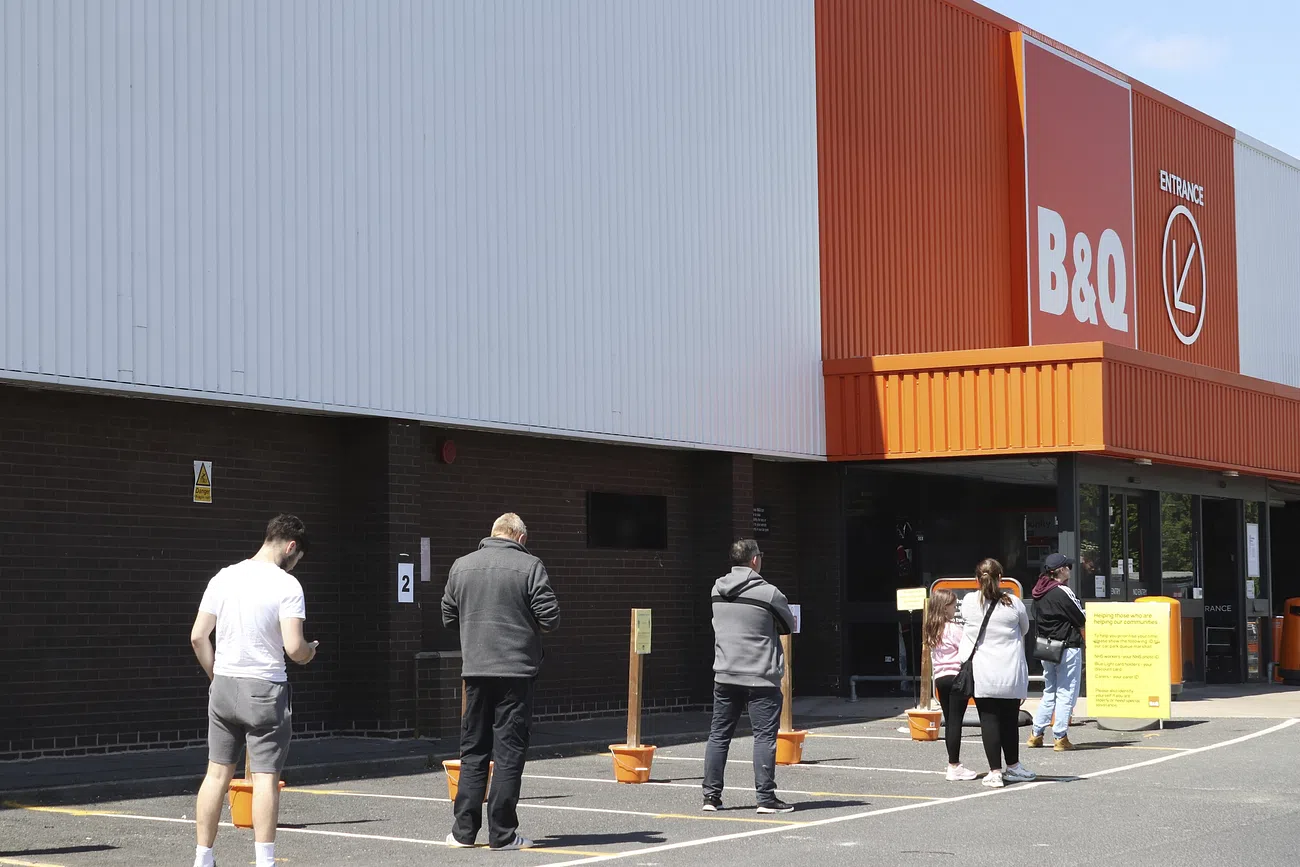

In [ ]:
class Queue:
    """A Queue data structure."""
    
    def __init__(self):
        self.data = list()

    def push(self, item):
        """
        Adds a new item to the end of the queue.
        
        Parameters
        ----------
        item : object
           An item added to the queue
        """
        
        self.data.append(item)

    def pop(self):
        """
        Removes the item that is at the front of the queue and returns the item.

        Returns
        -------
        object 
             The least recent item added to the queue.     

        Example
        --------
        >>> queue = Queue()
        >>> queue.push(1)
        >>> queue.push([1, 2, "dog"])
        >>> queue.push("popcorn")
        >>> queue.pop()
        '1'
        """
        return self.data.pop(0)

    def isEmpty(self):
        """ 
        Checks to see if the queue is empty. 

        Returns
        -------
        bool 
            True if the stack contains no items, False otherwise.    

        Example
        --------
        >>> queue = Queue()
        >>> queue.push(1)
        >>> Queue.isEmpty()
        False
        
        """
        return len(self.data) == 0
    
    def __str__(self):
        return self.data.__str__()

In [ ]:
q = Queue()

q.push("first")  # often called "enqueue"
q.push("second")

print(q)

In [ ]:
q.pop() # often called "dequeue"

In [ ]:
print(q)

In [ ]:
q.push("third")
q.push("fourth")

In [ ]:
print(q)

In [ ]:
while not q.isEmpty():
    print(q.pop())

<br><br>
**Question:** If we have a queue `[A, B, C, D]` with A at the front/head of the queue, what will the queue look like after the following operations:
- push `E` onto the queue
- push `F` onto the queue
- remove one item from the queue
- push `A` onto the queue

A: `[A, B, C, E, F]` \
B: `[A, F, E, B, C, D]` \
C: `[B, C, D, E, F, A]` \
D: Not sure
<br><br>

## Recursive Data Structures

### Recursion Introduction

#### Setting the Stage
- Writing software is largely about breaking down problems into smaller, more manageable pieces
  - Complex applications are broken down into packages or modules
  - Modules are broken down into functions and sub-functions
  - etc.
- Some divisions of a problem are easier to work with than others
- Recursion is a **tool for breaking down problems** in a different way

#### Factorial: Iterative Definition
$n!=n(n-1)(n-2)...(2)(1)$

Useful for counting permutations and computing probabilities.

For example, if you have 5 books on a shelf, how many different ways can you organize them?

$5!=5 \times 4 \times 3 \times 2 \times 1=120$

Let's look at an iterative implementation.

In [ ]:
def factorial(n):
    """
    Computes the factorial of the input n (n!).

    Parameters
    ----------
    n : int
        The value to compute factorial of. Must be a positive integer.

    Returns
    -------
    integer
        The value of n!
    """
    result = n
    while n > 1:
        result = result * (n-1)
        n = n-1
    return result

In [ ]:
print("5! =", factorial(5))

#### How are we breaking down this problem?
- each step is a multiplication operation
- we keep track of the "working result" at each step

This is the iterative approach.


#### Execution Schematic
```
factorial(5):

        Execution                   State:
        ---------------             ----------
Step 1: result=5                    result=5
Step 2: result=result*4             result=20
Step 3: result=result*3             result=60
Step 4: result=result*2             result=120
Step 5: result=result*1             result=120
Step 6: return result
```

### Factorial: Recursive Definition 

#### Another way to break up the problem

We first defined factorial as follows:

**Definition 1:**

$n!=n(n-1)(n-2)...(2)(1)$

Another way to define the factorial is:

**Definition 2:**

$n!=n(n-1)!$

We can define the problem in terms of itself! This is the recursive approach.
- Rather than write out all the steps or the algorithm, we **define the nth step in terms of the (n-1)th step**
- This is called the **inductive step** or **recursive step**

_(We're calling a function from within itself here, which might seem weird at first. We will talk about what is going on in more detail here a little later on. For now, just think of it in terms of the mathematical definition 2.)_

In [ ]:
def factorial_recursive(n):
    """
    Computes the factorial of the input n (n!).

    Parameters
    ----------
    n : int
        The value to compute factorial of. Must be a positive integer.

    Returns
    -------
    integer
        The value of n!
    """
    return n * factorial_recursive(n-1) # n(n-1)!


In [ ]:
print("5! =", factorial_recursive(5))

---
<br><br><br><br><br>



<br><br><br><br><br>

---

Oops, we are missing something important!

We've found a problem in our recursion.


#### Aside: Stack overflow

<img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Stack_Overflow_logo.svg/512px-Stack_Overflow_logo.svg.png">

(Image source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Stack_Overflow_logo.svg))

- A stack overflow error most commonly occurs when a recursive function makes an exceedingly large numbers of calls to itself (usually because of not properly setting up a base case), causing the memory allocated for a function's call stack to overflow.

- Python prevents this from happening by throwing a `RecursionError` when a certain number of recursive calls are made (this number is system-dependent)

#### Revise Recursive Definition to Include Base Case

Let's revise **Definition 2** to define when to stop:

$n! = \begin{cases} n(n-1)!~, &  & n > 1 \\ 1~~~~~~~~~~~~~~~, &  & n=1 \end{cases}$




Now we have the two essential parts to any recursive algorithm:
- **Inductive Step** ("how do we call the function from within itself")
- **Base Case** ("when do we stop")

<img src="https://i.imgflip.com/7wmphv.jpg" style="width:20rem"></img>

> (Image attribution to Jake Clark, edited from [source](https://jake-clark.tumblr.com/post/100946716432))

Now, let's adjust the implementation to include the second part of **Definition 2**.

In [ ]:
def factorial_recursive(n):
    """
    Computes the factorial of the input n (n!).

    Parameters
    ----------
    n : int
        The value to compute factorial of. Must be a positive integer.

    Returns
    -------
    integer
        The value of n!
    """
    if n == 1:
        return 1
    return n * factorial_recursive(n-1)


In [ ]:
print("5! =", factorial_recursive(5))
# print("5! =", factorial_recursive(5000))

### How are we breaking up this problem?
- each step is a factorial operation
- at the base case, we return a constant (end the recursion)
- Don't need to keep track of an intermediary result

## What happens when we call a function recursively?


### Execution Schematic
```
factorial_recursive(5):

Level 1: 5*factorial_recursive(4)
  Level 2: 4*factorial_recursive(3)
    Level 3: 3*factorial_recursive(2)
      Level 4: 2*factorial_recursive(1)
        Level 5: return 1
      Level 4: return 2*1
    Level 3: return 3*2
  Level 2: return 4*6
Level 1: return 5*24
```

### Time & Space Complexity

**Question:** What is the time complexity of `factorial`?

```python
def factorial(n):
    result = n
    while n > 1:
        result = result * (n-1)
        n = n-1
    return result
```

<br><br><br>
**Answer:** $O(n)$


 **Question:** What is the time complexity of `factorial_recursive`?

```python
def factorial_recursive(n):
    if n == 1:
        return 1
    return n * factorial_recursive(n-1)
```

A: O(1) \
B: O(n) \
C: O(log(n)) \
D: O(nlog(n)) \

<br><br><br>

<br><br><br>
**Answer:** $O(n)$

**Question:** What is the space complexity of `factorial`?

A: $O(1)$ \
B: $O(n)$ \
C: $O(log(n))$ \
D: $O(n^2)$ \
<br><br><br>



<br><br><br>
**Answer:** $O(1)$

**Question:** What about the space complexity of `factorial_recursive`?
```python
def factorial_recursive(n):
    if n == 1:
        return 1
    return n * factorial_recursive(n-1)
```

A: $O(1)$ \
B: $O(n)$ \
C: $O(log(n))$ \
D: $O(n^2)$ \
<br><br><br>

<br><br><br>
**Answer:** $O(n)$

Why is this? Each time we make a recursive function call, we enter a new **"stack frame"** (or "level" in our execution schematic). Each stack frame takes up space in memory.

### Linked lists

We have talked about nested data structures, like:

In [ ]:
x = [[1, 2, 3], ["a", "b", "c"]]
x

- This is a list of lists. 
- We can also have a doll within a doll:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Russian-Matroshka.jpg" width="600">

(Image attribution to Fanghong, from [Wikipedia article](https://en.wikipedia.org/wiki/Matryoshka_doll))

- Consider that you wanted to store items, one inside each doll.
- How would you add a new item? Describe it in words.
   - To the outside?
   - To the inside?

In [ ]:
class TreasureBox:
    """
    A linked list, aka treasure box. The user add and retrive items from it.
    """

    def __init__(self, treasure):
        self.next = None # data type: TreasureBox
        self.treasure = treasure # data type: whatever

    def append_outer(self, treasure):
        """Add a new treasure box to the outside by putting lastest box inside it.

        Parameters
        ----------
        treasure : object
           the label designated to the newly covered treasure box

        Returns
        -------
        new_box : TreasureBox
             new treasure box object containing previous boxes inside    

        Example
        --------
        >>> box = box.append_outer(10)
        """

        new_box = TreasureBox(treasure)
        new_box.next = self
        return new_box

    def append_inner(self, treasure):
        """Add a new treasure box inside the innermost current box.

        Parameters
        ----------
        treasure : object 
           the label designated to the newly inserted treasure box

        Returns
        -------
        new_box : TreasureBox
             new treasure box object contained within innermost box of 
             the last treasure box    

        Example
        --------
        >>> box.append_inner(55)
        """

        if self.next is None:
            self.next = TreasureBox(treasure)
        else:
            self.next.append_inner(treasure)
        return self

    def get(self, depth):
        """Get the treasure by going depth levels deep into the treasure boxes.

        Parameters
        ----------
        depth : int 
           the depth of which to unwrap the treasure box 

        Returns
        -------
        object : 
             the treasure retrieved after recursing the specified depth. 

        Example
        --------
        >>> box = TreasureBox(12)
        >>> box = box.append_outer(9)
        >>> box = box.append_inner(55)
        >>> box.get(0)
        9 
        >>> box.get(2)
        55
        """

        if depth == 0:
            return self.treasure

        if self.next is None:
            return None  # Index out of bounds

        return self.next.get(depth-1)

In [ ]:
box = TreasureBox("$5")

box = box.append_outer("$100")
box = box.append_outer("$20")

In [ ]:
box.get(0)

In [ ]:
box.get(1)

In [ ]:
box.get(2)

In [ ]:
box.get(3)

In [ ]:
box = TreasureBox("Initial box")

box = box.append_inner("Box in initial box")
box = box.append_inner("Box in the second box")

In [ ]:
box.get(0)

In [ ]:
box.get(1)

In [ ]:
box.get(2)

In [ ]:
box.get(3)

Activity: without running the code, what will this return?

In [ ]:
box = TreasureBox("A")

box = box.append_inner("B")
box = box.append_outer("C")
box = box.append_outer("D")
box = box.append_inner("E")

box.get(3)

```
[D [C [A [B [E]] ]]]
```

- In computer science, this is called a [linked list](https://en.wikipedia.org/wiki/Linked_list).
- It's not just a nested data structure (list of lists); the definition of the data type itself is recursive. 
  - What is a list? It contains stuff (including possibly lists).
  - What is a treasure box? It contains one thing, and _another treasure box_.

#### Recursive algorithms vs. data structures

- We have a relationship between recursive function calls (see `append_inner` and `get`) and recursive data types (see `__init__`).
- Recursion is an important idea in understanding algorithms _and_ data structures.

#### Could we just implement this with lists?

- Yes, if we decide each list contains 2 elements, an item and another list.
- But using OOP we can make it more clear / less buggy.

## Trees, binary search trees

- Trees are recursive data structures, like the linked lists.
- In lab, you will implement a set based on trees instead of a hash table.
  - In particular this data structure is called a [binary search tree](https://www.geeksforgeeks.org/binary-search-tree-data-structure/).
  - We will talk about them a bit to help with the lab.
- Below we have a generic tree:

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Organizational_chart.svg" width="600">

(Image attribution to TotoBaggins, from [Wikipedia article](https://en.wikipedia.org/wiki/Organizational_chart))

Tree terminology:

- A tree is either empty or a node with zero or more _children_ that are themselves trees (or "subtrees").
- If $X$ is the child of $Y$, then $Y$ is the _parent_ of $X$ (e.g. Captain A is a child of Colonel B; Colonel B is the parent of Captain A).
- The _root_ is the only node without a parent (e.g. General).
- A _leaf_ is a node that does not have children (e.g. Private A).
- An _internal node_ is a node that is not a leaf (e.g. Captain A).
- The _height_ (aka _depth_) of the tree is the largest number of edges connecting the root to a leaf (here, 4).


Let's build a simple binary tree class using Python. A binary tree is a tree where each node has at most 2 children (the above is not a binary tree). So each tree node will have a label and two children.

In [ ]:
class BinaryTree:
    
    def __init__(self, label):
        self.label = label
        self.left = None  # type = BinaryTree
        self.right = None # type = BinaryTree
    
    def contains(self, target):
        if self.label == target:
            return True
        
        leftContains = False if self.left  is None else self.left.contains(target)
        rightContains= False if self.right is None else self.right.contains(target)
        return leftContains or rightContains

    # We would want some more functions here, e.g. to add/remove things from the tree.

Let's manually build a binary tree containing some of the information in the example above:

In [ ]:
root = BinaryTree("General")
root.left = BinaryTree("Colonel A")
root.right = BinaryTree("Colonel B")
root.right.left = BinaryTree("Captain A")
root.right.right = BinaryTree("Captain B")

In [ ]:
root.contains("Clown")

In [ ]:
root.contains("Captain B")

In [ ]:
type(root)

In [ ]:
type(root.left)

- The key idea here is that, like `TreasureBox`, the `BinaryTree` object stores more binary tree objects.
- However, each `TreasureBox` only stores one `TreasureBox`, whereas each `BinaryTree` stores **two** `BinaryTree`s.

#### Binary search trees (BSTs)

- A _binary tree_ is a tree where each node has at most 2 children.
- A binary tree is a _binary search tree_ if, for all nodes, all keys in its left subtree are smaller than its key, and all keys in its right subtree are larger than its key.

In [ ]:
"abc" < "zzz"

To do in class: draw out a binary search tree, show the process of adding nodes.

```
            8
          /   \
         1    13
             /  \
            9   5942

```

```
    1
     \
      2
       \
        3
         \ 
          4
           \
            5
```

- Requirement to use BSTs: we must be able to compare keys.
- Compare this to a hash table: we need to be able to hash the keys. 

Computational complexity: 

- Binary search trees (BSTs) can be slow if they become very unbalanced (think of adding numbers in increasing order).
- Industrial strength implementations stay balanced and are still efficient.
- Deletion is more tricky and we won't cover it here.
- But the take-home message is that search/insert/delete all run in $O(\log n)$ time, which is pretty fast.

#### Could we do this with lists/dictionaries?

- Again, yes. But here the python data type best reflects the conceptual structure best.

## Nearest neighbours intro (Optional)

- A common problem (DSCI 571, 563, more) is to find the _nearest neighbours_ of a point.
- We can start in 2D:

In [ ]:
# You can ignore the code - we'll just look at the plot
###

# Creating Data
n = 20
np.random.seed(1)
X = np.random.rand(n, 2)

In [ ]:
# Creating Dataframe
data = pd.DataFrame({'x0': X[:, 0], "x1" : X[:, 1]})
data['m0'] = .5
data['m1'] = .5

# Creating Plot
chart1 = alt.Chart(data).mark_circle(size=60).encode(
    x= alt.X('x0',
             axis=alt.Axis(grid=False)),
    y = alt.Y('x1',
             axis=alt.Axis(grid=False)))


chart2 = alt.Chart(data).mark_circle().encode(
    x= alt.X('m0',
              axis=alt.Axis(title = "")),
    y = alt.Y('m1',
               axis=alt.Axis(title = "")),
    color = alt.value('red'),
    size = alt.value(50)
)

chart1 + chart2

- Which blue points are nearest to the red ("query") point?
  - To define "nearest" we need a notion of _distance_.
  - For now, we'll use Euclidean distance (the one you're used to from day-to-day life).
  - In future courses, this might change.
  - Choosing a distance metric is actually important in machine learning.

The algorithmic approach is:

1. Find the distance from the red point to all the blue points.
2. Find the smallest distances.

In [ ]:
# It's OK if you don't understand this code, especially during lecture


def nearest_neighbour(data, query):
    """
    Find the point in the data that is nearest to the query point.

    Parameters
    ----------
    data : numpy.ndarray
        a 2D array containing the points as rows
    query : numpy.ndarray
        a 1D array containing the query point
    
    Returns
    -------
    int
        the index of the nearest point
                 
    Example
    --------
    >>> array = np.array([[1, 1], [2, 5], [5, 6], [3, 0], [9, 9]])
    >>> nearest_neighbour(array, [10, 10])
    4
    """
    
    if query.ndim == 1:
        query = query[None]

    return np.argmin(np.sum((data - query)**2, axis=1))

In [ ]:
print(X)

In [ ]:
query = np.array([0.5, 0.5])
nn = nearest_neighbour(X, query)
nn

In [ ]:
X[8]

**Question:** what is the time complexity of `nearest_neighbour` if we have $n$ points in $k$ dimensions?

A: $O(n)$ \
B: $O(k)$ \
C: $O(n^2k)$ \
D: $O(nk)$ 
<br><br><br>

<br><br><br>

**Answer:** $O(nk)$, because we have to loop over all $n$ points, and computing the distance requires looping over the $k$ dimensions.

- Problem: this may be way too slow!
- For example, if you want to find similar items on Amazon, and they have a billion items, you don't want to have to look through _all_ of them every time.

## $k$-d trees (Optional)


- Sometimes we speed things up with faster algorithms.
  - We'll see a lot of that in the future. 
- But, as we've seen with trees and hash tables, sometime we speed things up with _better data structures_. 
- One of the classic ways to speed up nearest neighbours is a data structure call the [$k$-d tree](https://en.wikipedia.org/wiki/K-d_tree).
- (Optional) Warning: the use of the letter $k$ here is a bit unfortunate.
  - In future machine learning courses, we'll use $d$ instead of $k$.
  - This will also help avoid confusion with $k$-nearest neighbours, which is a totally different $k$.
  - But I do understand not wanting to call them $d$-d trees... so we'll use $k$ for today.

In [ ]:
# You do not need to read/understand this code, but I think
# you shouldn't have any problem understanding it with a bit of time spent.


class KDTree:
    """A k-d tree data structure for fast nearest neighbour searches"""

    def __init__(self):

        self.location = None
        self.leftSubTree = None # type KDTree
        self.rightSubTree = None # type KDTree
        self.dim = None
        self.data = None

    def build(self, data, depth=0):
        """
        Build the k-d tree from the given data.
        Implementation inspired by https://en.wikipedia.org/wiki/K-d_tree

        Parameters
        ----------
        data : numpy.ndarray
            a 2D array where each row is a point in space
        depth : int 
            this can be ignored, for internal bookkeeping (default: 0)    
        """
        nrows = data.shape[0]
        self.dim = depth % data.shape[1]
        self.data = data

        self.location = np.median(data[:, self.dim])
        # above, or just data[nrows//2,dim] after sorting
        # although this one will average if there's a tie.

        if nrows == 1:
            return

        data = data[np.argsort(data[:, self.dim])]

        self.leftSubTree = KDTree()
        self.leftSubTree.build(data[:nrows//2], depth+1)

        self.rightSubTree = KDTree()
        self.rightSubTree.build(data[nrows//2:], depth+1)

    def approximateNearestNeighbour(self, query):
        """
        Find the nearest neighbor to the query point.
        However, this is just approximate; it finds a point in
        the same rectangle, not necessarily the actual nearest neighbour.
        This is just for educational purposes; a correct algorithm
        exists but it's too messy to put here.

        Parameters
        ----------
        query : numpy.ndarray 
            a point in space

        Returns
        -------
        numpy.ndarray
            the coordinates of the point closest to the query
        """
        if self.data.shape[0] == 1:
            return self.data[0]

        if query[self.dim] < self.location:
            return self.leftSubTree.approximateNearestNeighbour(query)
        else:
            return self.rightSubTree.approximateNearestNeighbour(query)

    def plot2d(self, depth=1, minx=0.0, maxx=1.0, miny=0.0, maxy=1.0):
        """
        Plot the k-d tree.

        Parameters
        ----------
        depth : int
            how deep to go down the tree when plotting (defult: 0)
        minx : int
            the left edge of the plot (default: 0.0)
        maxx : int
            the right edge of the plot (default: 1.0)
        miny : int
            the bottom edge of the plot (default: 0.0)
        maxy : int
            the top edge of the plot (default: 0.0)

        Returns
        -------
        numpy.ndarray
            the coordinates of the point closest to the query    
        """

        data = pd.DataFrame({'x0': self.data[:, 0], "x1": self.data[:, 1]})
        chart1 = alt.Chart(data).mark_circle(size=60).encode(
            x=alt.X('x0',
                    axis=alt.Axis(grid=False)),
            y=alt.Y('x1',
                    axis=alt.Axis(grid=False)))
        charts_list = [chart1]
        if depth == 0:
            return

        if self.dim == 0:
            data2 = pd.DataFrame(
                {'x0': (self.location, self.location), "x1": (miny, maxy)})
            chart2 = alt.Chart(data2).mark_line().encode(
                x=alt.X('x0',
                        axis=alt.Axis(grid=False)),
                y=alt.Y('x1',
                        axis=alt.Axis(grid=False)))
            charts_list.append(chart2)

            if self.leftSubTree is not None:
                chart0l = self.leftSubTree.plot2d(
                    depth-1, minx=minx, maxx=self.location, miny=miny, maxy=maxy)
                charts_list.append(chart0l)
            if self.rightSubTree is not None:
                chart0r = self.rightSubTree.plot2d(
                    depth-1, minx=self.location, maxx=maxx, miny=miny, maxy=maxy)
                charts_list.append(chart0r)
        elif self.dim == 1:
            data3 = pd.DataFrame(
                {'x0': (minx, maxx), "x1": (self.location, self.location)})
            chart3 = alt.Chart(data3).mark_line().encode(
                x=alt.X('x0',
                        axis=alt.Axis(grid=False)),
                y=alt.Y('x1',
                        axis=alt.Axis(grid=False)))
            charts_list.append(chart3)
            if self.leftSubTree is not None:
                chart1l = self.leftSubTree.plot2d(
                    depth-1, minx=minx, maxx=maxx, miny=miny, maxy=self.location)
                charts_list.append(chart1l)
            if self.rightSubTree is not None:
                chart1r = self.rightSubTree.plot2d(
                    depth-1, minx=minx, maxx=maxx, miny=self.location, maxy=maxy)
                charts_list.append(chart1r)

        params = list(filter(None, charts_list))
        return alt.layer(*params).encode()

        # alt.layer(*params).display()
        #alt.layer(whisker_low, box, whisker_high, midline, data=data)

Basic idea:

- In each recursive step, there is a certain number of datapoints. If there's only one, we're done.
- Otherwise, for one of the two dimensions (we alternate back and forth), find the median value along the dimension.
- Split the data into two subsets based on being above or below that median, and build a (sub)tree for each of those subsets.
- Starting from the full dataset, you will create a tree where each leaf is a datapoint.
- You can find an approximate nearest neighbour by traversing the down the tree using the same decision points as were used to original split the data; the final leaf is the desired neighbour.

In [ ]:
np.median(X[:,0])

In [ ]:
kdt = KDTree()
kdt.build(X)
kdt.plot2d(depth=1)

In [ ]:
kdt = KDTree()
kdt.build(X)

In [ ]:
kdt.plot2d(depth=2)

In [ ]:
kdt.plot2d(depth=3)

In [ ]:
kdt.plot2d(depth=4)

In [ ]:
kdt.plot2d(depth=6)

In [ ]:
kdt.approximateNearestNeighbour(np.array([1, 1]))

In [ ]:
X[nearest_neighbour(X, np.array([1,1]))]

In [ ]:
kdt.approximateNearestNeighbour(np.array([0.5, 0.5]))

In [ ]:
X[nearest_neighbour(X, np.array([0.5,0.5]))]

- Doesn't work perfectly here, but there is a fast correct algorithm, which is beyond the scope of the course.
  - See [`sklearn.neighbors.KDTree`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree).
- However, $k$-d trees get slow when the number of dimensions is large.
- Some alternative methods are discussed below.

In [ ]:
# ??sklearn.neighbors.KNeighborsClassifier

In [ ]:
# ??sklearn.neighbors.KDTree

#### Timing experiments

We'll time scikit-learn's `KDTree` and compare it to brute force.

In [ ]:
n_sizes = [100, 1000, 10_000, 100_000]

results = defaultdict(list)
results["n"] = n_sizes

d = 10

for n in n_sizes:
    print('n: ', n)
    X = np.random.rand(n, d)
    query = np.random.rand(1, d)

    print("  KDTree")
    time = %timeit -q -o -r 3 sklearn.neighbors.KDTree(X)
    results["KDTree init"].append(time.average)
    KDT = sklearn.neighbors.KDTree(X)

    time = %timeit -q -o -r 3 KDT.query(query)
    results["KDTree query"].append(time.average)

    print("  Brute force")
    time = %timeit -q -o -r 3 nearest_neighbour(X, query)
    results["Brute force"].append(time.average)

In [ ]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

**Question:** What does the time complexity look like for the 3 columns?
<br><br><br>

<br><br><br>

**Answer:** Brute force looks linear, the query looks logarithmic(?), the initialization grows _faster than linear_, perhaps $O(n \log n)$ or perhaps something else, we won't worry about that here.

**Question:** Which is better, the $k$-d tree or brute force?

A: KD Tree \
B: Brute Force \
C: It depends
<br><br><br>

<br><br><br>

**Answer:** It depends how many queries you do.

## Amortization (Optional)

Let's focus on $n=10000$, and $k=10$. Then,

- $k$-d tree initialization takes $\approx 4$ ms
- $k$-d tree query takes $\approx 0.1$ ms
- brute force search takes $\approx 1$ ms

**Question:** How many queries do we need to do such that the $k$-d tree is better?

<br><br><br><br><br><br>
**Answer:** around 5.

- So if we're doing 100 queries, the $k$-d tree is much better.
- This reflects a general phenomenon in algorithms: **doing a lot of work up front to save time later**.
  - We saw this earlier with sorting a list and then doing binary search multiple times.
- We say the up-front effort is _amortized_ (or spread out) over the many queries.
- In some cases, we can make more precise calculations.
  - For example, we say hash table operations are $O(1)$.
  - In fact, once in a while a slower operation must be done.
  - However, we can show that an $O(n)$ operation only needs to be done every $1/n$ steps.
  - In which case we say the cost is amortized and the overall cost is still $O(1)$. 
  - This is an important idea.
  - You will see this in DSCI 513 with the idea of indexing a database.

#### Other nearest neighbour approaches

- Note: there are other nearest neighbour approaches besides $k$-d trees, including some very fast approximate algorithms. 
- In general, _you can often do something faster if the result can be slightly wrong_.
- There are approaches based on hashing instead of trees.
- Here are some resources:
  - [`sklearn.neighbours` documentation](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)
  - Approximate nearest neighbours, e.g. [locality-sensitive hashing](https://en.wikipedia.org/wiki/Locality-sensitive_hashing) (LSH), [this package](https://github.com/spotify/annoy).

#### Related: amortization of hash table growth

- Growth is slow, but only occurs rarely, and so the cost "averages out" because after adding $n$ elements you've spent $O(n)$ time on growth, for an average of $O(1)$ per insertion.

## `defaultdict` & `Counter` (optional)

_Meta-comment: As with parts of our labs, this could be considered DSCI 511 content. But 1 course isn't enough for all the Python we need!_

- Python dictionaries are super useful
- It's often the case that we want to add something to the value of a dictionary. 
- Example: listing multiples


In [ ]:
multiples_of_5 = list()
for i in range(100):
    if i % 5 == 0:
        multiples_of_5.append(i)

print(multiples_of_5)

In [ ]:
multiples_of_2 = list()
for i in range(100):
    if i % 2 == 0:
        multiples_of_2.append(i)

print(multiples_of_2)

In [ ]:
multiples_of_3 = list()
for i in range(100):
    if i % 3 == 0:
        multiples_of_3.append(i)

print(multiples_of_3)

- But now let's say we want multiples of 2, 3, 4, 5, 6, 7, 8, 9 all in one place.
- Well, we don't want to violate DRY and copy-paste the above code.
- A dictionary would be ideal for this!

In [ ]:
multiples_of = dict()

for base_number in range(2, 10):
    print("Finding the multiples of", base_number)
    
    for i in range(100):
        if i % base_number == 0:
            multiples_of[base_number].append(i)

print(multiples_of)

- What happened here?
- I tried `multiples_of[base_number]` but that key was not present in the dictionary.
- I need to initialize all those lists!
- Another attempt:

In [ ]:
multiples_of = dict()

for base_number in range(2, 10):
    print("Finding the multiples of", base_number)
    
    for i in range(100):
        if i % base_number == 0:
            if base_number not in multiples_of:    # added
                multiples_of[base_number] = list() # added
                
            multiples_of[base_number].append(i)

print(multiples_of)

- This works but we Python users are a bit lazy.
- Enter the `defaultdict`.
- A dictionary with a **default value** for cases when the key does not exist.
- Use case here: the default is an empty list!

In [ ]:
d = dict()
d["hello"]

In [ ]:
# equivalent to d["hello"] but returns 5 if "hello" is not in d
d.get("hello", 5) 

In [ ]:
d[4] = 100000
# since d[4] DOES exist, we get the stored value rather than the default
d.get(4, 5)

In [ ]:
from collections import defaultdict

In [ ]:
dd = defaultdict(list)
dd["hello"]

In [ ]:
dd["new key"].append(5)

In [ ]:
dd

- The beauty here is that we can call `append` on a key that doesn't exist.
- It defaults to a new empty list and then immediately appends.
- Side effect: **reading** from the dictionary can **modify** the dictionary (eg. reading `dd["hello"]`)
- So... our original (broken) code works again, if we change `multiples_of` to a `defaultdict`:

In [ ]:
multiples_of = defaultdict(list)

for base_number in range(2, 10):
    print("Finding the multiples of", base_number)
    
    for i in range(100):
        if i % base_number == 0:
            multiples_of[base_number].append(i)

print(multiples_of)

#### Type of `defaultdict` 

- In DSCI 511 you saw classes and inheritance.
- Just for fun, we can look at the implementation of `defaultdict` in PyPy, which is an implementation of Python in Python (the OG Python is written in C): https://github.com/reingart/pypy/blob/master/lib_pypy/_collections.py#L387
- We can see here that `defaultdict` inherits from `dict`. Indeed:

In [ ]:
type(d)

In [ ]:
type(dd)

In [ ]:
type(d) == type(dd)

In [ ]:
isinstance(d, dict)

In [ ]:
isinstance(dd, dict)

In [ ]:
type(dd) == dict

So in general people prefer the use of `isinstance(obj, class)` over `type(obj) == class`.

#### Aside: `list` vs `list()`

- Question: why was it `defaultdict(list)` instead of `defaultdict(list())`?
- What happens when I run this code:

In [ ]:
my_list = list()
my_list

In [ ]:
bad = defaultdict([])

In [ ]:
bad = defaultdict(list())

- But why?
- The code that executes first is `list()`.
- So we pass in **a particular list**.
- But we don't want one particular list, we want to create new lists all the time.
- So we need to pass in **the ability to create lists**
  - in other words, a **function that creates lists**
- That function is `list`

In [ ]:
list # This is a function

In [ ]:
list() # This is one list

In [ ]:
x = defaultdict(lambda : "hello I am your friendly neighbourhood default value")

In [ ]:
x[5]

In lab you need to count occurrences.
So, in that case, what is my default value?

In [ ]:
text = "Blah blah is he still talking about dictionaries??"

This can be done with a Python function:

In [ ]:
text.count('a')

If we're doing something more sophisticated, we might want to ignore this for now, and implement the counting ourselves:

In [ ]:
number_of_a = 0
for t in text:
    if t == "a":
        number_of_a += 1
        
number_of_a

- Ok, but now we want to count "a" and "b".
- Same as before, let's use a dict.
- We already know this won't work - it's the same problem as before:

In [ ]:
number_of_times = dict()

for char in ('a', 'b'):
    for t in text:
        if t == char:
            number_of_times[char] = number_of_times[char] + 1
        
number_of_times

So, we use a `defaultdict`.

**Question:** What do we want the default value to be?

<br><br><br>

<br><br><br>
**Answer:** 0
<br><br><br>


In [ ]:
defaultdict(0)

Oops! Right, it needs to be a **function**, not a specific value.

In [ ]:
defaultdict(lambda: 0)

In [ ]:
# The `int` function will return zero, so we can use that too
defaultdict(int)

In [ ]:
int()

Back to the code:

In [ ]:
number_of_times = defaultdict(int)

for char in ('a', 'b', 'c'):
    for t in text:
        if t == char:
            number_of_times[char] += 1
        
number_of_times

#### Counter

And finally, for the supremely ~~lazy~~ awesome, we can use `Counter`:

In [ ]:
from collections import Counter

This is basically a `defaultdict(int)` but with some fancy methods added:

In [ ]:
number_of_times = Counter()

for char in ('a', 'b'):
    for t in text:
        if t == char:
            number_of_times[char] += 1
        
number_of_times

In [ ]:
number_of_times.most_common(1)